# Optimizers
**Representative optimizers in neural network**<br>
Using defined function
- Adagrad
- Rmsprop
- Adam

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Minimum of function $f(x_1,x_2,...,x_n)$
Let $f(x_1,x_2) = e^{\frac{x_1}{5}}+5x_1^2+3x_2^2-2x_1x_2-7x_1-8x_2+5$<br>
And $\frac{\delta f(x_1,x_2)}{\delta x_1} = \frac{exp(\frac{x_1}{5})}{5}+10x_1-2x_2-7,\ \frac{\delta f(x_1,x_2)}{\delta x_2} = 6x_2-2x_1-8$(if you don't know differentiation of function, you can calculate using **numerical differentiation method**)

In [2]:
#f(x1,x2)
def fx(x):
    x1 = x[0]
    x2 = x[1]
    return np.exp((x1)/5)+5*(x1**2) + 3*(x2**2) - 2*x1*x2 - 7*x1 - 8*x2+5

In [3]:
#gradient of f
def gfx(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([np.exp(x1/5)/5+10*x1-2*x2-7, 6*x2-2*x1-8])

In [4]:
#numerical gradient
def ngf(f, x, h=0.001):
    x_ = x.copy()
    result = []
    for i in range(len(x)):
        x_[i] = x_[i] + h
        result.append((f(x_)-f(x))/h)
        x_ = x.copy()
    return np.array(result)

In [5]:
x = [1,1]

In [6]:
print("gfx : ",gfx(x))
print("ngf : ", ngf(fx,x, 0.0001))

gfx :  [ 1.24428055 -4.        ]
ngf :  [ 1.24478299 -3.9997    ]


In [7]:
def plot3d(X,Y,f):
    X,Y = np.meshgrid(X,Y)
    Z = np.array([])
    for x,y in zip(X,Y):
        Z = np.append(Z, f([x,y]))
    Z = Z.reshape(len(Z)//len(X), len(X))
      
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.figure(figsize=(12, 5))
    surf = ax.plot_surface(X,Y,Z,cmap='coolwarm',linewidth=0,antialiased=False)
    wire = ax.plot_wireframe(X,Y,Z,color='r',linewidth=0.1)
    fig.colorbar(surf,shrink=0.5,aspect=5)
    fig.tight_layout()
    plt.show()

In [8]:
def plotContour(X,Y,f):
    X,Y = np.meshgrid(X,Y)
    Z = np.array([])
    for x,y in zip(X,Y):
        Z = np.append(Z, f([x,y]))
    Z = Z.reshape(len(Z)//len(X), len(X))

    plt.figure(figsize=(12, 5))
    cp = plt.contourf(X, Y, Z, 
                     levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50)
                    )
    plt.colorbar(cp)
    plt.show()

In [9]:
X=np.arange(-10,10,0.1)
Y=np.arange(-10,10,0.1)

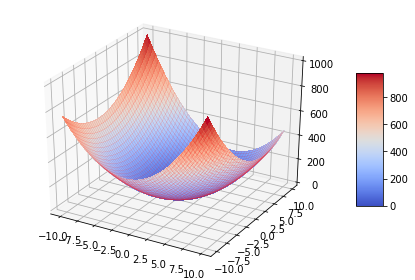

<Figure size 864x360 with 0 Axes>

In [10]:
plot3d(X,Y,fx)

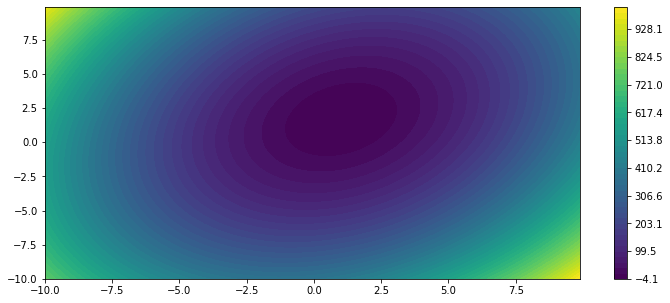

In [11]:
plotContour(X,Y,fx)

Global minimum of x is about (2,2)

## Adagrad
If gradient of $x_i$ is large, chage of $x_i$ is small<br>
$h \leftarrow h+\frac{\delta f}{\delta x_i}\times \frac{\delta f}{\delta x_i} $<br>
$x_i \leftarrow x_i - \lambda \frac{1}{\sqrt{h}} \frac{\delta f}{\delta x_i}$

In [12]:
def adagrad(f, gfx, x, ir=100, h=np.array([0.1,0.1]), lamb=0.1, th=0.00001):
    h = h.copy()
    log = np.array([])
    for i in range(ir):
        log = np.append(log, x)
        gx = gfx(x)
        h += gx**2
        xNew = x-lamb*gx/(h**(1/2))
        if(sum(abs(x-xNew)) <th):
            break
        x = xNew
    log = log.reshape(len(log)//2, 2)
    return x, i, log

In [13]:
x = np.array([-10,-10])

In [14]:
x = np.array([0,0])  # init variable

xm, _, log = adagrad(fx, gfx, x, ir=1000)

In [16]:
fx(xm)  # minimum

-4.112352244740471

In [17]:
fx([1,2])

-3.7785972418398295

In [30]:
gfx(xm)

array([ 0.0002859 , -0.00109325])

In [31]:
def plotLog(log):
    df = pd.DataFrame(log)
    df.columns = ['x','y']
    df['z'] = np.array(list(range(len(df))))
  #  df['z'] = np.log(df['z']+1)
    sns.scatterplot(
        data=df, x='x', y='y', hue='z'
    )

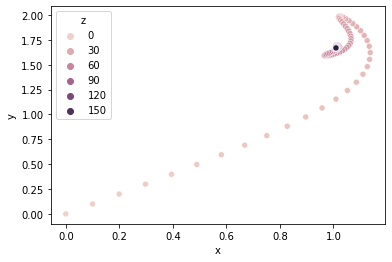

In [32]:
plotLog(log)

## RMSProp
**Adagrad** + $\rho$<br>
$h_i \rightarrow \rho h_{i-1} + (1-\rho)\frac{\delta f}{\delta x_i} \frac{\delta f}{\delta x_i}$

In [22]:
def rmsprop(f, gfx, x, ir=100, h=np.array([0.1, 0.1]), gamma=0.001, lamb=0.1, 
                    rho = 0.5, th=0.00001):
    h = h.copy()
    log = np.array([])
    for i in range(ir):
        log = np.append(log, x)
        gx = gfx(x)
        h = rho*h + (1 - rho)*gx**2
        xNew = x-lamb*gx/(h**(1/2))
        if(sum(abs(x-xNew)) <th):
            break
        x = xNew
    log = log.reshape(len(log)//2, 2)
    return x, i, log

In [23]:
x = np.array([0,0])
xm, _, log = rmsprop(fx, gfx, x, rho=0.8,ir=1000)

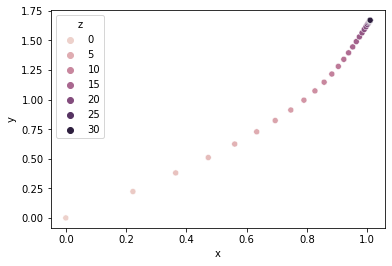

In [24]:
plotLog(log)

## Adam
**Momentum** + **RMSProp**<br>
ref : [ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION](https://arxiv.org/pdf/1412.6980.pdf)

<img src="./adam.png" width=600 height=600 />

In [27]:
def adam(gfx, x, ir=1000, alpha = 0.1, beta1 = 0.9, beta2 = 0.999,
                epsilon = 10e-8, th=0.00001):
    m = 0
    v = 0
    t = 1
    log = np.array([])
    while t < ir:
        log = np.append(log, x)
        gx = gfx(x)
        m = beta1 * m + (1 - beta1) * gx
        v = beta2 * v + (1- beta2) * gx **2
        mh = m / (1 - beta1 ** t)  # m hat
        vh = v / (1 - beta2 ** t)  # v hat
        x_new = x - alpha * mh / (vh ** (1/2) + epsilon)
        if(sum(abs(x-x_new)) <th):
                break
        x = x_new
        t += 1
    log = log.reshape(len(log)//2, 2)
    return x, t, log

In [28]:
x = np.array([0,0])
xm, _, log = adam(gfx, x, alpha = 0.1)

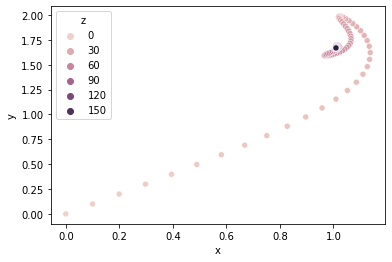

In [29]:
plotLog(log)

## Result

- In this case, RMSProp has minimum iter to converge